In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Crop\cropdata.csv')

In [3]:
df.tail()

,State_Name,District_Name,Season,Temperature,PH,Rainfall,Phosphorous,Nitrogen,Potash,crop
121076,Sikkim,WEST DISTRICT,Kharif,15.566117,7.693354,58.073681,4.564863,8.180757,0.000000,urad
121077,Sikkim,EAST DISTRICT,Rabi,25.391389,6.101766,62.610572,49.117328,22.066996,12.035480,wheat
121078,Sikkim,NORTH DISTRICT,Rabi,25.881600,6.181125,30.692217,53.876553,23.047927,12.743419,wheat
121079,Sikkim,SOUTH DISTRICT,Rabi,24.774702,6.929148,58.606499,47.295222,24.395453,11.042995,wheat
121080,Sikkim,WEST DISTRICT,Rabi,23.613468,6.643719,53.631079,54.345860,26.842375,13.102743,wheat


In [4]:
df.size

1210810

In [5]:
df.shape

(121081, 10)

In [6]:
df.columns

Index(['State_Name', 'District_Name', 'Season', 'Temperature', 'PH',
       'Rainfall', 'Phosphorous', 'Nitrogen', 'Potash', 'crop'],
      dtype='object')

In [7]:
df['crop'].unique()

array(['arhar/tur', 'bajra', 'barley', 'coriander', 'cotton(lint)',
       'dry chillies', 'gram', 'groundnut', 'jowar', 'linseed', 'maize-k',
       'maize-r', 'masoor', 'moong(green gram)', 'onion',
       'peas & beans (pulses)', 'potato', 'ragi', 'rapeseed &mustard',
       'rice', 'safflower', 'sugarcane', 'sunflower', 'turmeric', 'urad',
       'wheat', 'garlic', 'cowpea(lobia)', 'ginger'], dtype=object)

In [8]:
df.dtypes

State_Name        object
District_Name     object
Season            object
Temperature      float64
PH               float64
Rainfall         float64
Phosphorous      float64
Nitrogen         float64
Potash           float64
crop              object
dtype: object

In [9]:
df['crop'].value_counts()

wheat                    7520
maize-k                  7320
gram                     7074
rapeseed &mustard        6978
rice                     6878
arhar/tur                6798
sugarcane                6297
urad                     5947
moong(green gram)        5577
groundnut                5359
bajra                    4672
linseed                  4335
potato                   4165
dry chillies             4104
masoor                   4096
barley                   4017
onion                    3985
cotton(lint)             3974
peas & beans (pulses)    3965
turmeric                 3676
coriander                2830
maize-r                  2735
sunflower                2577
ragi                     2448
jowar                    1592
safflower                1301
garlic                    544
cowpea(lobia)             241
ginger                     76
Name: crop, dtype: int64

<AxesSubplot:>

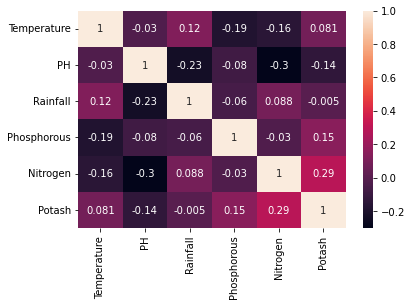

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
#Seperating features and target label
features = df[['Temperature','PH','Rainfall','Phosphorous','Nitrogen','Potash']]
target = df['crop']

In [12]:
##accuracy and model name
acc = []
model = []

In [13]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

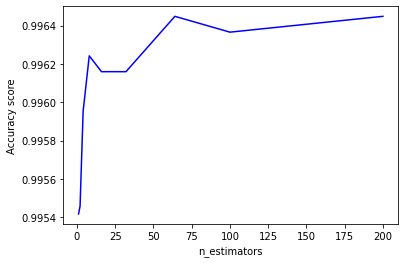

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()    

In [15]:
acc_score

[0.9954164429945905,
 0.9954577363009456,
 0.9959532559772061,
 0.9962423091216914,
 0.9961597225089813,
 0.9961597225089813,
 0.9964487756534666,
 0.9963661890407565,
 0.9964487756534666]

In [16]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9961597225089813
                       precision    recall  f1-score   support

            arhar/tur       1.00      1.00      1.00      1356
                bajra       1.00      1.00      1.00       880
               barley       1.00      1.00      1.00       779
            coriander       1.00      1.00      1.00       545
         cotton(lint)       1.00      1.00      1.00       775
        cowpea(lobia)       1.00      1.00      1.00        47
         dry chillies       0.92      0.97      0.94       814
               garlic       1.00      1.00      1.00       103
               ginger       1.00      1.00      1.00        13
                 gram       1.00      1.00      1.00      1458
            groundnut       1.00      1.00      1.00      1092
                jowar       1.00      1.00      1.00       325
              linseed       1.00      1.00      1.00       940
              maize-k       1.00      1.00      1.00      1505
              ma

<AxesSubplot:xlabel='Accuracy', ylabel='Algorithm'>

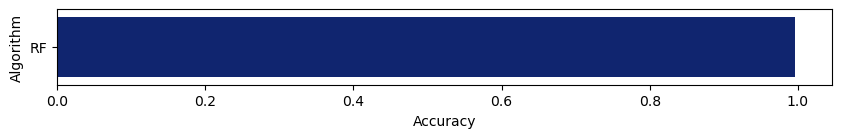

In [17]:
plt.figure(figsize=[10,1],dpi = 100)

plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [18]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99624231, 0.99591179, 0.99624215, 0.9958705 , 0.99566402])

In [19]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

RF --> 0.9961597225089813


In [20]:
#[ 'Temperature', 'PH',   'Rainfall', 'Phosphorous', 'Nitrogen', 'Potash', 'crop']
data = np.array([[25,6,30,53,23,12,]])
prediction = RF.predict(data)
print(prediction)

['wheat']
